In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

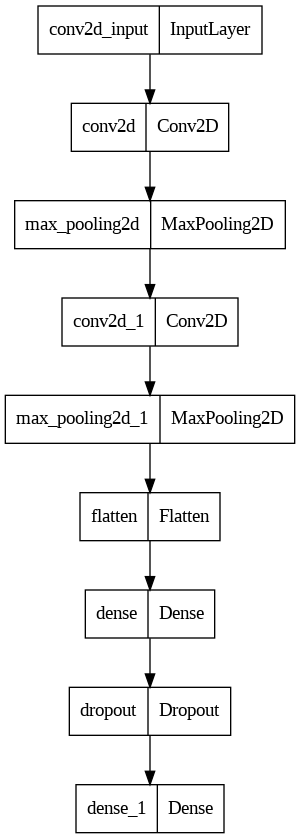

In [7]:
keras.utils.plot_model(model)

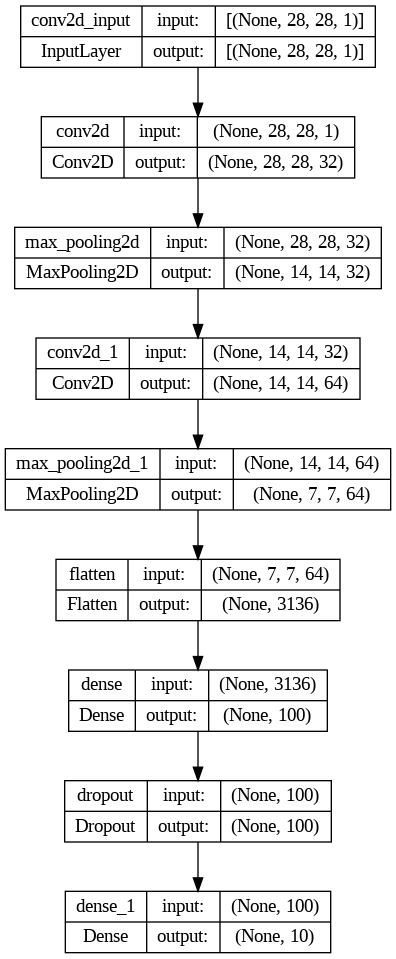

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 68s 44ms/step - loss: 0.5080 - accuracy: 0.8193 - val_loss: 0.3179 - val_accuracy: 0.8820
Epoch 2/20
   1/1500 [..............................] - ETA: 1:39 - loss: 0.4131 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 68s 46ms/step - loss: 0.3370 - accuracy: 0.8791 - val_loss: 0.2761 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2853 - accuracy: 0.8969 - val_loss: 0.2512 - val_accuracy: 0.9070
Epoch 4/20
1500/1500 [==============================] - 90s 60ms/step - loss: 0.2582 - accuracy: 0.9076 - val_loss: 0.2290 - val_accuracy: 0.9153
Epoch 5/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2327 - accuracy: 0.9149 - val_loss: 0.2360 - val_accuracy: 0.9148
Epoch 6/20
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2166 - accuracy: 0.9215 - val_loss: 0.2227 - val_accuracy: 0.9190
Epoch 7/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1978 - accuracy: 0.9268 - val_loss: 0.2121 - val_accuracy: 0.9222
Epoch 8/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1829 - accuracy: 0.9321 - val_loss: 0.2279 - val_accura

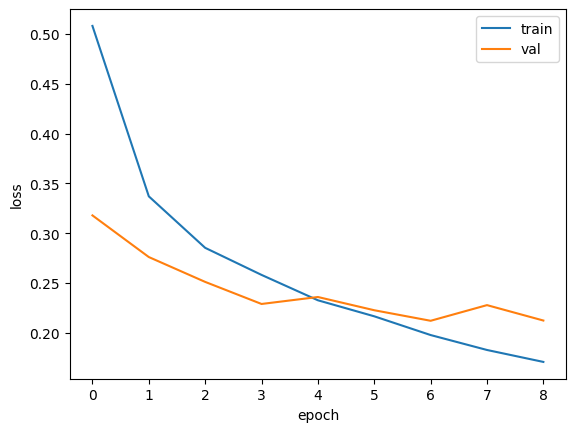

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 8s 21ms/step - loss: 0.2121 - accuracy: 0.9222


[0.21214459836483002, 0.922166645526886]

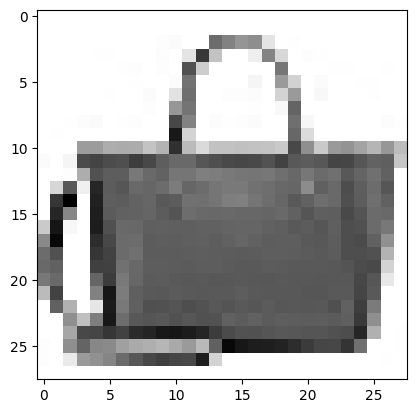

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 108ms/step
[[3.5878503e-12 4.3603474e-18 1.1286230e-15 3.2912266e-13 2.9967217e-15
  1.9006441e-15 4.3224338e-13 8.3073312e-14 1.0000000e+00 1.3518412e-12]]


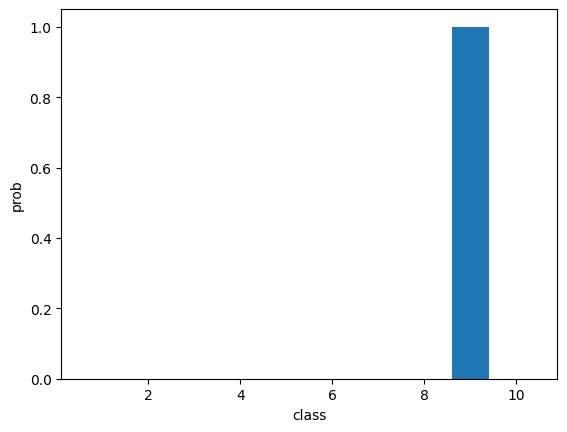

In [15]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 8s 23ms/step - loss: 0.2381 - accuracy: 0.9172


[0.23811133205890656, 0.9172000288963318]